In [39]:
import math
import numpy as np
from matplotlib import pyplot as plt 
import os
import scipy.io as sio

path = 'allFaces.mat'
data = sio.loadmat(path)
faces = data['faces']
n = data['n'][0][0]
m = data['m'][0][0]
nfaces = np.ndarray.flatten(data['nfaces'])
print(nfaces.shape[0], 'people with indiv img count:', nfaces)
print('images:', len(faces), 'n:', n, 'm:', m)
imgs = np.array(faces)

train_set_raw = []

# (save last 3 people for testing)
for j in range(len(nfaces)-3):
    plt.clf()
    personCluster = np.zeros((n*8, m*8))
    x = 0
    y = 0
    for i in range(nfaces[j]):
        img = np.array(imgs[:, i + np.sum(nfaces[:j])]).reshape(m, n).T
        train_set_raw.append(img.flatten())
        personCluster[y*n:(y+1)*n, x*m:(x+1)*m] = img
        x += 1
        if (x == 8):
            x = 0
            y += 1
    # plt.figure(figsize=(10, 10))
    # plt.suptitle('Person ' + str(j+1))
    # plt.imshow(personCluster, cmap='gray')
    # plt.show()

print(len(train_set_raw))
        

# for i in range(100):
#     img = np.array(imgs[:, i]).reshape(m, n).T
#     plt.imshow(img, cmap='gray')
#     plt.show()

38 people with indiv img count: [64 62 64 64 62 64 64 64 64 64 60 59 60 63 62 63 63 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64]
images: 32256 n: 192 m: 168
2218


<Figure size 432x288 with 0 Axes>

In [40]:
# vectorize training images
raw_trn_fac = np.array(train_set_raw).T
print(raw_trn_fac.shape)
print(raw_trn_fac[10])

# determine mean image
mean_fac = np.mean(raw_trn_fac, axis=1)
print(mean_fac.shape)
print(mean_fac)

# center image intensities on mean
raw_trn_fac = raw_trn_fac - np.tile(mean_fac, (raw_trn_fac.shape[1], 1)).T
print(raw_trn_fac.shape)
print(raw_trn_fac[10])

# # compute covariance matrix
# cov_fac = np.cov(raw_trn_fac, rowvar=False)
# print(cov_fac.shape)

# SVD analysis
e_faces, _, _ = np.linalg.svd(raw_trn_fac, full_matrices=False)

# print('U shape:', U.shape)
# print('S shape:', S.shape)
# print('VT shape:', VT.shape)
# print('S:', S)
# print('VT:', VT)

(32256, 2218)
[105 122 128 ...   2   3   3]
(32256,)
[61.47475203 62.64427412 63.61496844 ... 45.3534716  44.18440036
 43.51397656]
(32256, 2218)
[ 35.6767358  52.6767358  58.6767358 ... -67.3232642 -66.3232642
 -66.3232642]


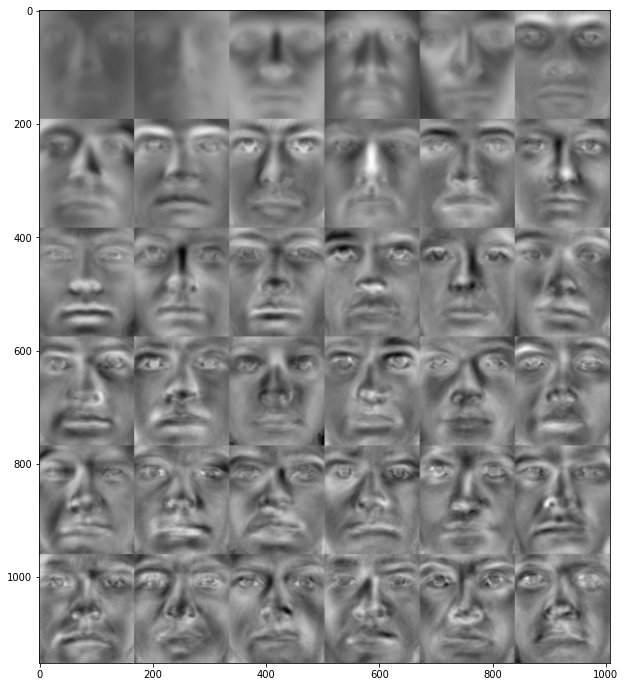

In [41]:
# plt.imshow(U[:, 0].reshape(n, m), cmap='gray')

# visualize prominent eigenfaces
visual_faces = np.zeros((n*6, m*6))
x = 0
y = 0
for i in range(36):
    img = np.array(e_faces[:, i]).reshape(n, m)
    visual_faces[y*n:(y+1)*n, x*m:(x+1)*m] = img
    x += 1
    if (x == 6):
        x = 0
        y += 1

plt.figure(figsize=(12, 12))
plt.imshow(visual_faces, cmap='gray')
plt.show()

192
(32256, 20) (32256,) (32256,)
(32256, 50) (32256,) (32256,)
(32256, 100) (32256,) (32256,)
(32256, 250) (32256,) (32256,)
(32256, 500) (32256,) (32256,)
(32256, 750) (32256,) (32256,)
(32256, 1000) (32256,) (32256,)
(32256, 20) (32256,) (32256,)
(32256, 50) (32256,) (32256,)
(32256, 100) (32256,) (32256,)
(32256, 250) (32256,) (32256,)
(32256, 500) (32256,) (32256,)
(32256, 750) (32256,) (32256,)
(32256, 1000) (32256,) (32256,)
(32256, 20) (32256,) (32256,)
(32256, 50) (32256,) (32256,)
(32256, 100) (32256,) (32256,)
(32256, 250) (32256,) (32256,)
(32256, 500) (32256,) (32256,)
(32256, 750) (32256,) (32256,)
(32256, 1000) (32256,) (32256,)
(32256, 20) (32256,) (32256,)
(32256, 50) (32256,) (32256,)
(32256, 100) (32256,) (32256,)
(32256, 250) (32256,) (32256,)
(32256, 500) (32256,) (32256,)
(32256, 750) (32256,) (32256,)
(32256, 1000) (32256,) (32256,)
(32256, 20) (32256,) (32256,)
(32256, 50) (32256,) (32256,)
(32256, 100) (32256,) (32256,)
(32256, 250) (32256,) (32256,)
(32256, 50

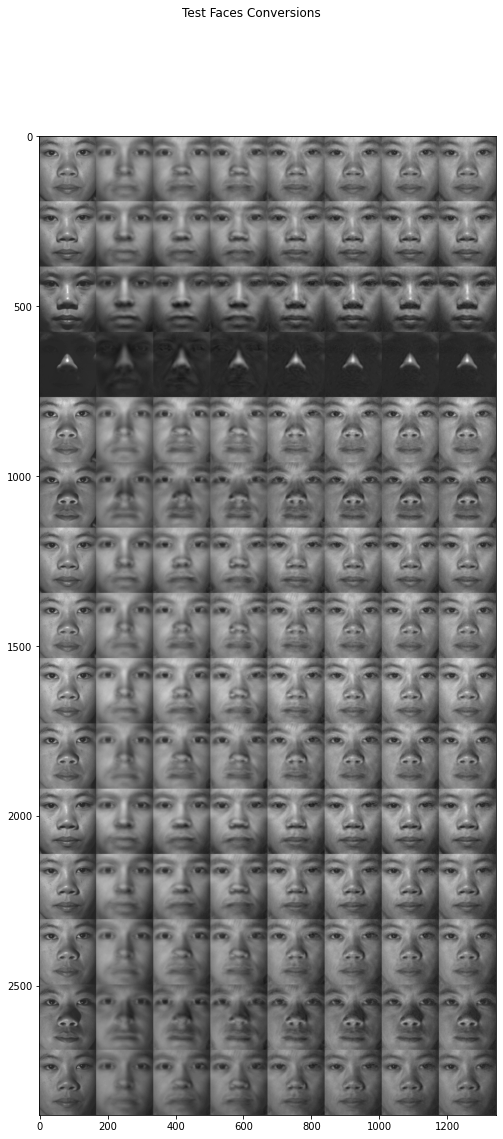

In [43]:
ef_cnts = [20, 50, 100, 250, 500, 750, 1000]

test_faces_raw = []
for j in range(len(nfaces)-3, len(nfaces)):
    for i in range(nfaces[j]):
        img = np.array(imgs[:, i + np.sum(nfaces[:j])]).reshape(m, n).T
        test_faces_raw.append(img.flatten())

print(len(test_faces_raw))
# plt.imshow(test_faces_raw[0].reshape(n, m), cmap='gray')
# plt.show()

face_fig = np.zeros((n*len(test_faces_raw), m*(1 + len(ef_cnts))))
for j, face in enumerate(test_faces_raw):
    face_fig[j*n:(j+1)*n, :m] = face.reshape(n, m)
    for i, cnt in enumerate(ef_cnts):
        e_val_vec = e_faces[:, :cnt]
        print(e_val_vec.shape, face.shape, mean_fac.shape)
        eig_comp_fac = np.matmul(e_val_vec.T, face - mean_fac)
        eig_comp_conv = np.matmul(e_val_vec, eig_comp_fac) + mean_fac
        face_fig[j*n:(j+1)*n, (i+1)*m:(i+2)*m] = eig_comp_conv.reshape(n, m)
    
plt.figure(figsize=(18,18))
plt.imshow(face_fig[:15*n, :], cmap='gray')
plt.suptitle('Test Faces Conversions')
plt.show()

np.save('e_faces_set_all_faces.npy', e_faces[:, :750])
np.save('mean_face_all_faces.npy', mean_fac)


